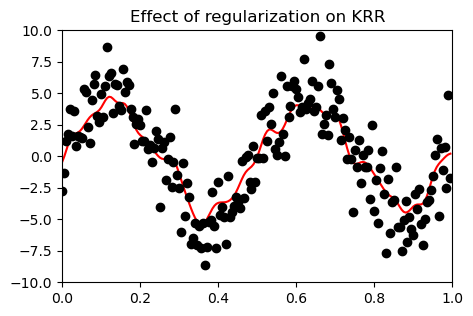

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
plt.rcParams['figure.dpi'] = 100
                           
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
number_pts=200
sigma_kernel=5./number_pts
t = np.arange(0.0, 1.0, 1./number_pts)

mu, sigma_noise = 0, 2 # mean and standard deviation
noise = np.random.normal(mu, sigma_noise, t.size)

a0 = 5
f0 = 2
lmbda0=1E-2
s = a0*np.sin(2*np.pi*f0*t)+noise

from scipy.spatial.distance import pdist, squareform
pairwise_sq_dists = squareform(pdist(np.reshape(t,[-1,1]), 'sqeuclidean'))
K = np.exp(-pairwise_sq_dists / sigma_kernel**2)

sapprox = np.dot(K,np.linalg.solve(K+lmbda0*t.size*np.eye(t.size), s))

l1, = plt.plot(t, sapprox,'r-')
l, = plt.plot(t, s,'ko')
plt.axis([0, 1, -10, 10])

plt.title('Effect of regularization on KRR');

In [4]:
t.shape

(200,)

In [6]:
np.shape(np.reshape(t,[-1,1]))

(200, 1)

In [7]:
t.size

200

In [9]:
out = pdist(np.reshape(t,[-1,1]))

In [11]:
out1 = squareform(pdist(np.reshape(t,[-1,1]), 'sqeuclidean'))

In [12]:
out1.shape

(200, 200)